# **Análisis de Componentes Principales (PCA)**

In [0]:
# por Manuel Sánchez-Montañés

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Primero se definen las funciones auxiliares que se usarán en el notebook:

In [0]:
#--------------------------------------------------------------------------------
# function X_rotados = rota_datos_alrededor_origen(X, angulo)
#
# esta funcion rota datos 2D en torno al origen
# angulo: en grados, y en contra de las agujas del reloj
#--------------------------------------------------------------------------------
def rota_datos_alrededor_origen(X, angulo):
    
    angle_rad = angulo*2.0*np.pi/360.0

    s = np.sin(angle_rad)
    c = np.cos(angle_rad)
    matriz_rotacion = np.matrix([[c,-s],[s,c]])
    X_rotados = matriz_rotacion*X # se rotan los puntos generados

    return X_rotados


#-----------------------------------------------------------------------------------
# genera_puntos_gaussiana2D(Npuntos, media, var1, var2, angulo)
#
# Npuntos: numero de puntos a generar
# media:   media de la Gaussiana (2 dimensiones) antes de rotar alrededor del origen
# var1:    varianza en el eje principal 1
# var2:    varianza en el eje principal 2
# angulo:  angulo a rotar (en grados) en el sentido contrario a las
#          agujas del reloj
#-----------------------------------------------------------------------------------
def genera_puntos_gausiana2D(Npuntos, media, var1, var2, angulo):
    
    X = np.random.randn(2, Npuntos)
    X[0,:] = X[0,:] * np.sqrt(var1) # se multiplica cada atributo por la
    X[1,:] = X[1,:] * np.sqrt(var2) # raiz cuadrada de la varianza deseada

    X[0,:] = media[0] + X[0,:]
    X[1,:] = media[1] + X[1,:]

    X = rota_datos_alrededor_origen(X, angulo)

    return X.transpose()

def vector_direccion(angulo):
    return np.array([np.cos(angulo*np.pi/180), np.sin(angulo*np.pi/180)])
    
def dibuja_hist(X, bins, color):
    plt.hist(X, bins=bins, color=color, histtype = 'step')

**Generación de los datos:**

In [0]:
problema = 2

if problema == 1:
    N = 200
    X = genera_puntos_gausiana2D(N,[10, 20],1,100,0) # número de puntos a generar, media, dos varianzas y giro
    y = np.zeros(N)
elif problema == 2:
    N = 100
    X = genera_puntos_gausiana2D(N,[0, 0],2,10,45)
    y = np.zeros(N)
else:
    N = 500
    angulo_giro = 0 # en grados
    X = genera_puntos_gausiana2D(N,[0, 0],2,2,angulo_giro)
    y = np.zeros(N)

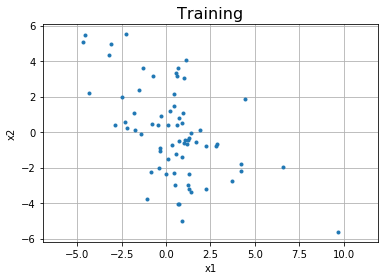

In [4]:
# Partimos en training/test:
from sklearn.model_selection import train_test_split
porc_test = 0.3
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=porc_test)

plt.plot(X_tr[:,0], X_tr[:,1], '.') 
plt.grid(True)
plt.axis('equal')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Training', fontsize=16)
plt.show()

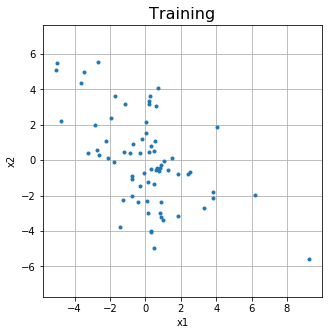

In [5]:
# Ahora se estandariza, calculando los parámetros de estandarización SÓLO CON EL CONJUNTO DE TRAINING
# (pero estandarizando también el conjunto de test)

# MAL: X = StandardScaler().fit_transform(X)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_std=False)
scaler.fit(X_tr)
X_train = scaler.transform(X_tr)
X_test = scaler.transform(X_te)
y_train = y_tr
y_test = y_te

plt.figure(figsize=(5,5))
plt.plot(X_train[:,0], X_train[:,1], '.') 
plt.grid(True)
plt.axis('equal')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Training', fontsize=16)
plt.show()

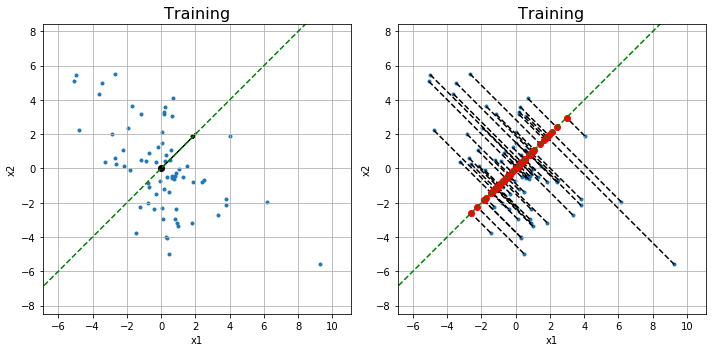

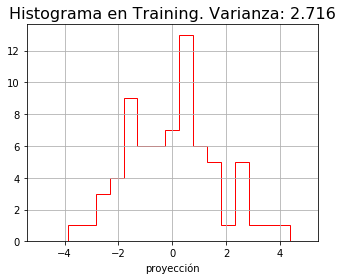

In [9]:
# Ahora proyectamos la nube en la dirección w:
angulo = 45; # en grados
w = vector_direccion(angulo)
factor = np.sqrt(np.max(np.cov(X_train,rowvar=False)))


Ntrain = len(y_train)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
plt.plot(X_train[:,0], X_train[:,1], '.', zorder=1) 
plt.grid(True)
plt.axis('equal')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Training', fontsize=16)
plt.plot(0, 0, 'ko')
ax1.arrow(0, 0, w[0]*factor, w[1]*factor, head_width=0.05*factor*1.5, head_length=0.1*factor*1.5, fc='k', ec='k')

aux = plt.axis()
plt.plot([-w[0]*10*factor,w[0]*10*factor], [-w[1]*10*factor,w[1]*10*factor],'g--')
plt.axis(aux)

X_train_proy = X_train*np.matrix(w).T
X_test_proy = X_test*np.matrix(w).T

ax2 = plt.subplot(1,2,2)

# Dibujamos proyecciones de cada patrón de entrenamiento en w
for i in range(Ntrain):
    plt.plot([X_train[i,0], w[0]*X_train_proy[i]], [X_train[i,1], w[1]*X_train_proy[i]], 'k--')
    plt.plot(w[0]*X_train_proy[i], w[1]*X_train_proy[i], 'ro')
    
plt.grid(True)
plt.axis('equal')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Training', fontsize=16)
ax1.arrow(0, 0, w[0]*factor, w[1]*factor, head_width=0.05*factor*1.5, head_length=0.1*factor*1.5, fc='k', ec='k')
plt.plot([-w[0]*10*factor,w[0]*10*factor], [-w[1]*10*factor,w[1]*10*factor],'g--')
plt.plot(X_train[:,0], X_train[:,1], '.', zorder=1) 
plt.axis(aux)
plt.tight_layout()


plt.figure(figsize=(5,4))
nbins = 20
mean_aux, std_aux = X_train_proy.mean(), X_train_proy.std()
xmin = mean_aux - 3*std_aux
xmax = mean_aux + 3*std_aux
xbins = np.linspace(xmin, xmax, nbins)
plt.hist(X_train_proy, xbins, color='r', histtype='step')
plt.grid(True)
plt.xlabel("proyección")
plt.title('Histograma en Training. Varianza: %.4g' % X_train_proy.var(ddof=1), fontsize=16)
plt.tight_layout()


Ángulo mejor valorado: 130.450
Valoración: 9.413


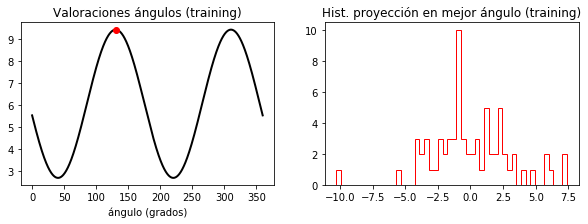

In [10]:
# Ahora se recorren los 360 grados de la circunferencia para buscar
# el mejor ángulo de acuerdo a nuestro criterio 

nangulos = 1000 # número de ángulos en los que vamos a dividir la circunferencia
angulos = np.linspace(0,360,nangulos)

valoraciones_angulos = np.zeros(nangulos)
for i in range(nangulos):
    w = vector_direccion(angulos[i])
    X_train_proy = X_train*np.matrix(w).T
#    valoraciones_angulos[i] = -np.sum(np.square(X_train_proy*np.matrix(w) - X_train))/(Ntrain-1)
    valoraciones_angulos[i] = X_train_proy.var(ddof=1)
    
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(angulos, valoraciones_angulos, 'k', lw=2)
ind_max = valoraciones_angulos.argmax()
plt.plot(angulos[ind_max], valoraciones_angulos[ind_max], 'ro', lw=2)
plt.title('Valoraciones ángulos (training)')
plt.xlabel('ángulo (grados)')

mejor_angulo = angulos[ind_max]
print("Ángulo mejor valorado: %.3f" % mejor_angulo)
print("Valoración: %.3f" % valoraciones_angulos[ind_max])

plt.subplot(1,2,2)
X_train_proy = X_train*np.matrix(vector_direccion(mejor_angulo)).T
bins = np.histogram(X_train_proy, 50)[1]
dibuja_hist(X_train_proy, bins, 'r')
plt.title('Hist. proyección en mejor ángulo (training)')
plt.show()

In [11]:
from numpy.linalg import eig as eig

Sigma = np.cov(X_train.T)

Autovalores, Autovectores = eig(Sigma)
# ahora reordeno la informacion obtenida para que
# el primer autovector sea siempre el de mayor autovalor
if Autovalores[0] < Autovalores[1]:
    Autovalores = Autovalores[[1,0]]
    Autovectores = Autovectores[:,[1,0]]

print('Sigma:\n', Sigma)

print('\nAutovectores:\n', Autovectores)
print('\nAutovalores:\n', Autovalores)

autovector1 = np.matrix(Autovectores[:,0]).T
autovalor1 = Autovalores[0]

print('\nAutovector con mayor autovalor (%f):\n' % autovalor1, autovector1)
#print(autovector1.T * Sigma * autovector1)


print('\nvarianza de la proyección de los datos originales en ese autovector:')
X_train_proy = X_train*autovector1
print(X_train_proy.var(ddof=1))


print('\nvector de proyección óptimo calculado en el for:')
print(np.matrix(vector_direccion(mejor_angulo)).T)


Sigma:
 [[ 5.51602676 -3.32751646]
 [-3.32751646  6.57101658]]

Autovectores:
 [[ 0.64939587 -0.76045052]
 [-0.76045052 -0.64939587]]

Autovalores:
 [9.4125893  2.67445404]

Autovector con mayor autovalor (9.412589):
 [[ 0.64939587]
 [-0.76045052]]

varianza de la proyección de los datos originales en ese autovector:
9.412589300488644

vector de proyección óptimo calculado en el for:
[[-0.6487902 ]
 [ 0.76096733]]
